# Credit Card Data Analysis

## 1. Setup and Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load Excel File
file_path = r"C:\Users\Medha Trust\OneDrive\Assingments\edulyt\Credit Banking.xls"
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Customer Acqusition', 'Spend', 'Repayment']

## 2. Load and Clean Customer Data

In [2]:
df_customers = pd.read_excel(xls, sheet_name='Customer Acqusition')
df_customers.columns = df_customers.columns.str.strip()

# Treat Age < 18
median_age = df_customers[df_customers['Age'] >= 18]['Age'].median()
df_customers['Age'] = df_customers['Age'].apply(lambda x: median_age if x < 18 else x)

df_customers.head()


,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,50.739782,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,50.739782,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


## 3. Load Spend and Repayment Sheets


In [5]:
df_spend = pd.read_excel(xls, sheet_name='Spend')
df_spend.columns = df_spend.columns.str.strip()

df_repay = pd.read_excel(xls, sheet_name='Repayment')
df_repay.columns = df_repay.columns.str.strip()

df_spend.head(), df_repay.head()


(   Sl No: Costomer      Month       Type         Amount
 0       1       A1 2004-01-12  JEWELLERY  473775.834869
 1       2       A1 2004-01-03      PETRO  335578.666019
 2       3       A1 2004-01-15    CLOTHES  371040.941912
 3       4       A1 2004-01-25       FOOD  141177.813256
 4       5       A1 2005-01-17     CAMERA  398403.771812,
    SL No: Costomer      Month         Amount
 0       1       A1 2004-01-12  331844.007374
 1       2       A1 2004-01-03  441139.807335
 2       3       A1 2004-01-15   32480.004009
 3       4       A1 2004-01-25   90636.966534
 4       5       A1 2005-01-17    1581.969829)

## 4. Monthly Spend and Repayment

In [6]:
monthly_spend = df_spend.groupby(['Costomer', 'Month'])['Amount'].sum().reset_index()
monthly_spend.rename(columns={'Costomer': 'Customer', 'Amount': 'Monthly_Spend'}, inplace=True)

monthly_repay = df_repay.groupby(['Costomer', 'Month'])['Amount'].sum().reset_index()
monthly_repay.rename(columns={'Costomer': 'Customer', 'Amount': 'Monthly_Repayment'}, inplace=True)

monthly_spend.head(), monthly_repay.head()


(  Customer      Month  Monthly_Spend
 0       A1 2004-01-03  335578.666019
 1       A1 2004-01-12  526000.887677
 2       A1 2004-01-15  371040.941912
 3       A1 2004-01-25  278552.250673
 4       A1 2004-02-05   41381.105869,
   Customer      Month  Monthly_Repayment
 0       A1 2004-01-03      441139.807335
 1       A1 2004-01-12      721918.797363
 2       A1 2004-01-15      109079.663890
 3       A1 2004-01-25       90636.966534
 4       A1 2004-02-05      191180.011618)

## 5. Top 10 Highest Paying Customers

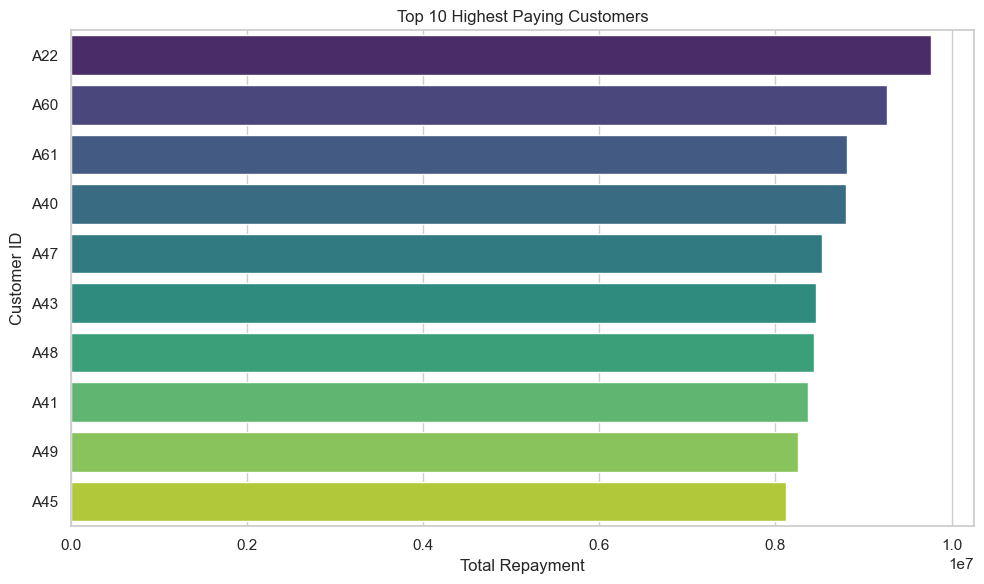

In [17]:
top_10_payers = (
    df_repay.groupby('Costomer')['Amount'].sum()
    .reset_index()
    .rename(columns={'Costomer': 'Customer', 'Amount': 'Total_Repayment'})
    .sort_values(by='Total_Repayment', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_payers,
    x='Total_Repayment',
    y='Customer',
    hue='Customer',          # Explicitly assign hue
    palette='viridis',
    legend=False             # Hide the redundant legend
)

plt.title("Top 10 Highest Paying Customers")  # Remove emoji to avoid font warning
plt.xlabel("Total Repayment")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


## 6. Segment-wise Spending

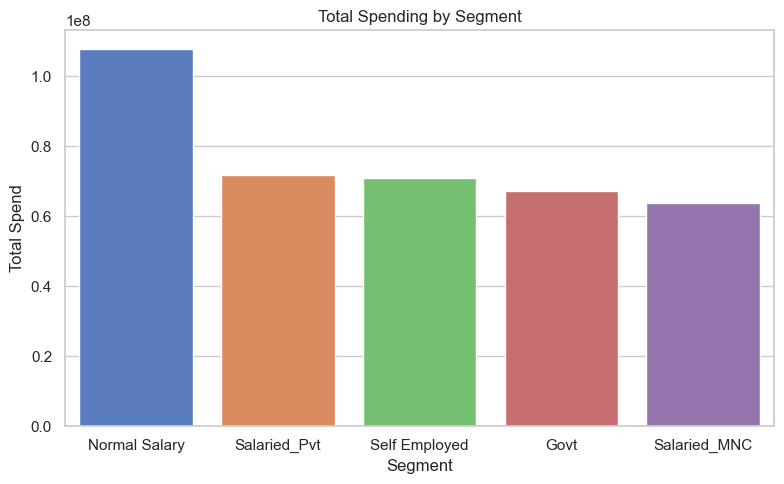

In [18]:
segment_spend = df_spend.merge(df_customers, left_on='Costomer', right_on='Customer')
segment_spending = segment_spend.groupby('Segment')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=segment_spending,
    x='Segment',
    y='Amount',
    hue='Segment',
    palette='muted',
    legend=False
)
plt.title("Total Spending by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()

## 7. Age Group-wise Spending

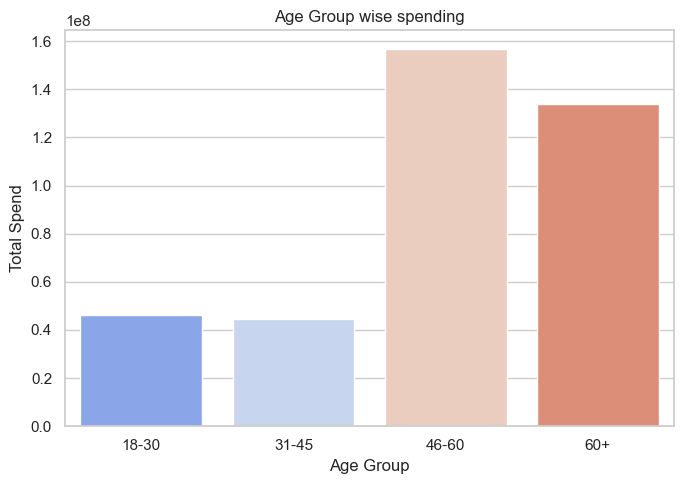

In [20]:
spend_age = df_spend.merge(df_customers, left_on='Costomer', right_on='Customer')
bins = [17, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '60+']
spend_age['Age_Group'] = pd.cut(spend_age['Age'], bins=bins, labels=labels)

# Group with observed=True to silence FutureWarning
age_spending = spend_age.groupby('Age_Group', observed=True)['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=age_spending,
    x='Age_Group',
    y='Amount',
    hue='Age_Group',           # Required for future Seaborn
    palette='coolwarm',
    legend=False               # Disable redundant legend
)

plt.title("Age Group wise spending")  # Removed emoji to prevent font warning
plt.xlabel("Age Group")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()

## 8. Most Popular Spending Categories

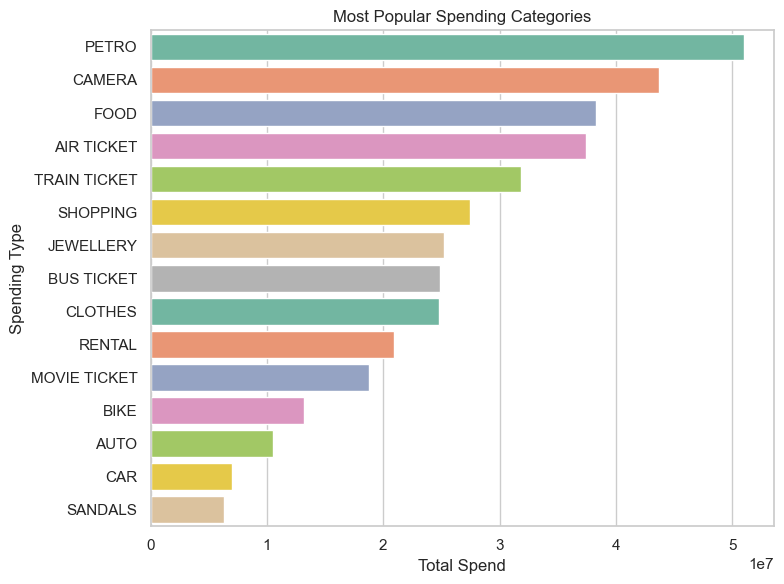

In [21]:
category_spending = (
    df_spend.groupby('Type')['Amount'].sum()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=category_spending,
    y='Type',
    x='Amount',
    hue='Type',           # Add hue to match future Seaborn expectations
    palette='Set2',
    legend=False          # Prevent redundant legend
)

plt.title("Most Popular Spending Categories")  # Removed emoji
plt.xlabel("Total Spend")
plt.ylabel("Spending Type")
plt.tight_layout()
plt.show()


## 9. Overspending Credit Limit

In [14]:
df_limit_check = monthly_spend.merge(df_customers[['Customer', 'Limit']], on='Customer', how='left')
overspending = df_limit_check[df_limit_check['Monthly_Spend'] > df_limit_check['Limit']]

overspending[['Customer', 'Month', 'Monthly_Spend', 'Limit']].head()


,Customer,Month,Monthly_Spend,Limit
1,A1,2004-01-12,526000.887677,500000
9,A1,2005-02-23,704755.260545,500000
15,A10,2004-01-15,609828.254814,500000
33,A11,2004-01-25,676996.216426,500000
34,A11,2004-02-05,501940.267611,500000


## 10. Interest on Due Amounts

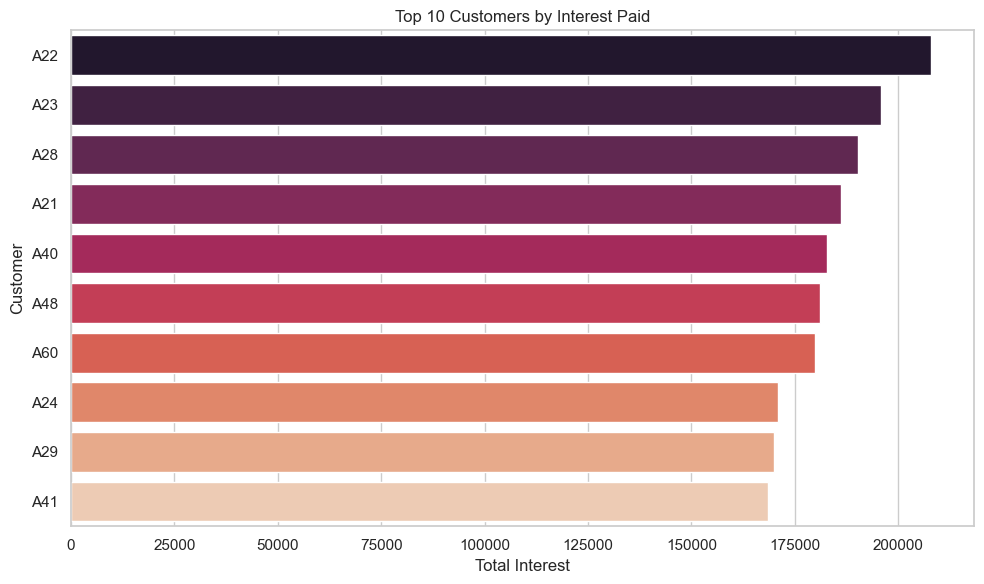

In [22]:
monthly_balances = pd.merge(monthly_spend, monthly_repay, on=['Customer', 'Month'], how='outer').fillna(0)
monthly_balances['Due'] = (monthly_balances['Monthly_Spend'] - monthly_balances['Monthly_Repayment']).clip(lower=0)
monthly_balances['Interest'] = monthly_balances['Due'] * 0.029

interest_per_customer = monthly_balances.groupby('Customer')['Interest'].sum().reset_index()

# Top 10 customers by interest paid
top_interest = interest_per_customer.sort_values(by='Interest', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_interest,
    y='Customer',
    x='Interest',
    hue='Customer',          # Required to avoid FutureWarning
    palette='rocket',
    legend=False             # Avoid redundant legend
)

plt.title("Top 10 Customers by Interest Paid")  # Removed emoji to avoid font warning
plt.xlabel("Total Interest")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()


## 11. Monthly Profit from Interest

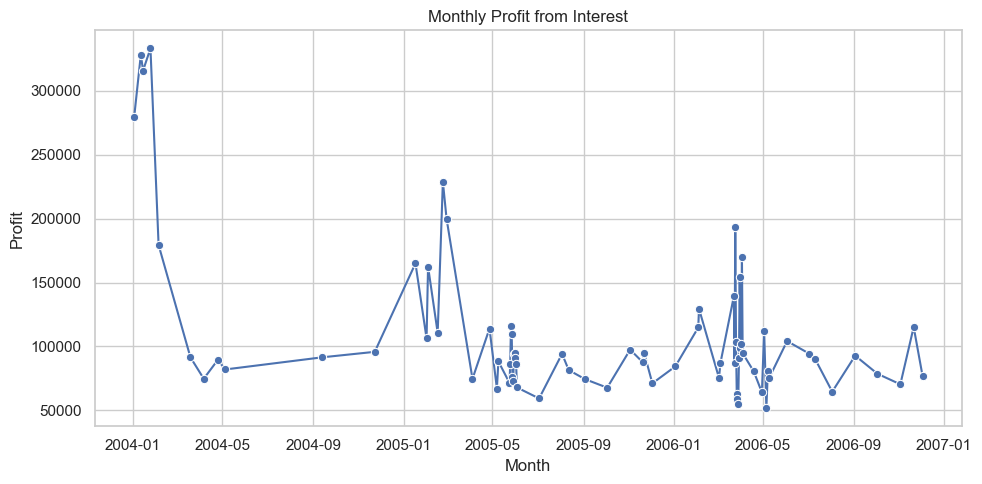

In [23]:
monthly_profit = monthly_balances.groupby('Month')['Interest'].sum().reset_index()
monthly_profit.rename(columns={'Interest': 'Monthly_Profit'}, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_profit, x='Month', y='Monthly_Profit', marker='o')
plt.title("Monthly Profit from Interest")  # No emoji
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


##  ** The End **